In [23]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [24]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')
target.drop('신용등급_1', axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   국가별          168 non-null    object 
 1   시점           168 non-null    int64  
 2   인당_국민총소득     168 non-null    float64
 3   GDP_성장률      168 non-null    float64
 4   디플레이터        163 non-null    float64
 5   수출           167 non-null    float64
 6   수입           159 non-null    float64
 7   무역의존도_수출     167 non-null    float64
 8   무역의존도_수입     159 non-null    float64
 9   외환보유액        168 non-null    int64  
 10  부채비율         140 non-null    float64
 11  국민부담률        146 non-null    float64
 12  평균근로자세금      158 non-null    float64
 13  경제활동참가율 (%)  168 non-null    float64
 14  고용률          150 non-null    float64
 15  실업률          168 non-null    float64
dtypes: float64(13), int64(2), object(1)
memory usage: 21.1+ KB


In [25]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입',
       '무역의존도_수출', '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율',
       '고용률', '실업률', '신용등급']
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        114 non-null    int64  
 1   인당_국민총소득  114 non-null    float64
 2   GDP_성장률   114 non-null    float64
 3   디플레이터     114 non-null    float64
 4   수출        114 non-null    float64
 5   수입        114 non-null    float64
 6   무역의존도_수출  114 non-null    float64
 7   무역의존도_수입  114 non-null    float64
 8   외환보유액     114 non-null    int64  
 9   부채비율      114 non-null    float64
 10  국민부담률     114 non-null    float64
 11  평균근로자세금   114 non-null    float64
 12  경제활동참가율   114 non-null    float64
 13  고용률       114 non-null    float64
 14  실업률       114 non-null    float64
 15  신용등급      114 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 14.4 KB


In [26]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률,신용등급
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1.710526,32750.570175,3.348246,95.848246,2.238427e+05,2.247745e+05,36.308246,36.257544,8.296503e+04,72.816588,34.342982,38.482456,60.285965,66.111404,8.215789,17.011752
std,1.053638,19334.244737,3.164914,13.415816,2.823353e+05,3.293057e+05,19.655216,19.602815,1.836847e+05,41.206568,7.007278,8.778587,5.906092,7.026458,4.194235,3.364981
min,0.000000,3911.000000,-5.500000,58.200000,3.092000e+03,3.919000e+03,8.240000,2.240000,2.790000e+02,6.788000,11.400000,14.700000,48.100000,46.300000,2.600000,3.900000
25%,1.000000,16402.250000,1.825000,88.625000,4.964800e+04,4.503625e+04,20.455000,22.787500,9.670250e+03,45.590500,30.500000,32.675000,57.325000,61.025000,5.100000,14.500000
50%,2.000000,31591.500000,2.950000,100.000000,1.204630e+05,8.910150e+04,31.785000,29.410000,3.217000e+04,62.237500,33.100000,38.800000,59.750000,66.200000,7.350000,18.000000
75%,3.000000,43878.500000,4.200000,103.900000,3.253045e+05,3.147872e+05,51.052500,50.712500,7.330925e+04,97.977500,39.350000,43.925000,63.175000,71.725000,9.825000,20.000000
max,3.000000,88706.000000,25.200000,143.100000,1.503400e+06,2.248800e+06,86.700000,84.740000,1.233153e+06,234.073000,48.000000,57.100000,81.400000,83.800000,24.900000,20.000000


In [27]:
ols_ = sm.ols('신용등급 ~ 시점 + 인당_국민총소득 + GDP_성장률 + 디플레이터	 + 수출 +  수입 + 무역의존도_수입 + 무역의존도_수출 + 외환보유액 + 부채비율 + 국민부담률 + 평균근로자세금 + 경제활동참가율 + 고용률 + 실업률',data=datasets)
result = ols_.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   신용등급   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     23.51
Date:                Thu, 12 May 2022   Prob (F-statistic):           6.02e-26
Time:                        17:12:37   Log-Likelihood:                -212.63
No. Observations:                 114   AIC:                             457.3
Df Residuals:                      98   BIC:                             501.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0972      3.581      0.306      0.7

In [28]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(ols_.exog, i)} 
             for i, column in enumerate(ols_.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,시점,3.658601
1,인당_국민총소득,2.626577
2,GDP_성장률,1.258021
3,디플레이터,3.626153
4,수출,15.780228
5,수입,13.553811
6,무역의존도_수입,10.918495
7,무역의존도_수출,8.646362
8,외환보유액,2.268825
9,부채비율,2.282654


d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


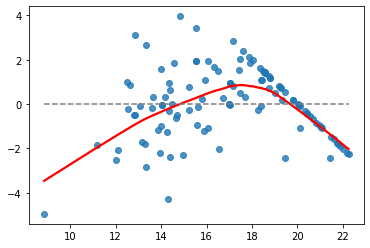

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


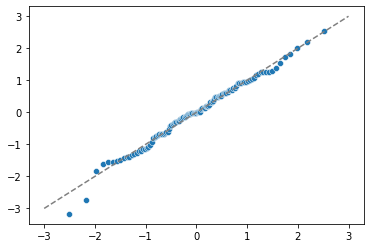

d:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


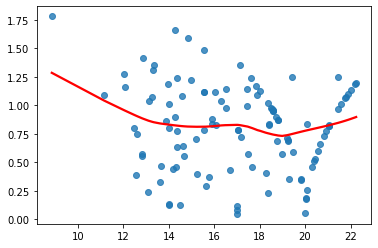

In [29]:
fitted = result.predict(datasets)
residual = datasets['신용등급'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

## 출처 : https://ysyblog.tistory.com/120